<a href="https://colab.research.google.com/github/Ahmed-Ragab/machine-learning-zoomcamp/blob/main/Bank_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd
import numpy as np

our desired target for classification task will be **converted** variable - has the client signed up to the platform or not.

In [65]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv'

In [66]:
df = pd.read_csv(data)
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [67]:
# Check data length
df.shape[0]

1462

**Data preparation**

In [68]:
# Check missing values in the features columns
df.isnull().sum()

,0
lead_source,128
industry,134
number_of_courses_viewed,0
annual_income,181
employment_status,100
location,63
interaction_count,0
lead_score,0
converted,0


In [69]:
# Get categorical features dynamically
categorical_features = df.select_dtypes(include='object').columns.tolist()
categorical_features

# We can use the following syntax as well
#categorical_features = df.columns[df.dtypes == 'object'].tolist()
#categorical_features



['lead_source', 'industry', 'employment_status', 'location']

In [70]:
# Get numerical features dynamically
numerical_features = [col for col in df.columns[df.dtypes != 'object'].tolist() if col != 'converted']
numerical_features

['number_of_courses_viewed',
 'annual_income',
 'interaction_count',
 'lead_score']

In [71]:
# Fill Null values according to their data type
df[categorical_features] = df[categorical_features].fillna('NA')
df[numerical_features] = df[numerical_features].fillna(0)

In [72]:
# Check missing values after filling
df.isnull().sum()

,0
lead_source,0
industry,0
number_of_courses_viewed,0
annual_income,0
employment_status,0
location,0
interaction_count,0
lead_score,0
converted,0


In [73]:
# Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [74]:
df_test.shape


(293, 9)

In [75]:
df_train.shape

(876, 9)

In [76]:
df_val.shape

(293, 9)

In [77]:
# Prepare data for training, validating, and testing
df_train.reset_index(drop = True)
df_val.reset_index(drop = True)
df_test.reset_index(drop = True)

y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

del df_train['converted']
del df_val['converted']
del df_test['converted']

**Question 1: ROC AUC feature importance**

ROC AUC could also be used to evaluate feature **importance of numerical variables.**

Let's do that

For each numerical variable, use it as score and compute AUC with the "default" variable
Use the training dataset for that
If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['expenses'])

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

In [78]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [82]:
for c in numerical_features:
  auc = roc_auc_score(y_train, df_train[c])
  if auc < 0.5:
    auc = roc_auc_score(y_train, -df_train[c])
  print(c, round(auc,3))

  # number_of_courses_viewed and interaction_count appear to be the most important numerical features
  #for predicting conversion based on their AUC scores.

number_of_courses_viewed 0.764
annual_income 0.552
interaction_count 0.738
lead_score 0.614


**Question 2: Training the model**
Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [103]:
# Apply one-hot-encoding
from sklearn.feature_extraction import DictVectorizer



In [104]:
train_dicts = df_train[categorical_features + numerical_features].to_dict(orient='records')

In [105]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [106]:
X_train = dv.transform(train_dicts)

**Training logistic regression**

In [107]:
from sklearn.linear_model import LogisticRegression

In [108]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [109]:
val_dicts = df_val[categorical_features + numerical_features].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [110]:
model.predict_proba(X_val)

array([[0.42460497, 0.57539503],
       [0.52939231, 0.47060769],
       [0.38098764, 0.61901236],
       [0.3856108 , 0.6143892 ],
       [0.38258969, 0.61741031],
       [0.32503252, 0.67496748],
       [0.1534649 , 0.8465351 ],
       [0.61794984, 0.38205016],
       [0.44264642, 0.55735358],
       [0.08753249, 0.91246751],
       [0.22450641, 0.77549359],
       [0.33889578, 0.66110422],
       [0.08425614, 0.91574386],
       [0.61610817, 0.38389183],
       [0.11802477, 0.88197523],
       [0.10488222, 0.89511778],
       [0.34663631, 0.65336369],
       [0.46922352, 0.53077648],
       [0.26893297, 0.73106703],
       [0.29581544, 0.70418456],
       [0.21919679, 0.78080321],
       [0.48618156, 0.51381844],
       [0.11130187, 0.88869813],
       [0.27804185, 0.72195815],
       [0.08366914, 0.91633086],
       [0.46516068, 0.53483932],
       [0.49876916, 0.50123084],
       [0.15824127, 0.84175873],
       [0.51502522, 0.48497478],
       [0.39364538, 0.60635462],
       [0.

In [123]:
y_pred = model.predict_proba(X_val)[:, 1]

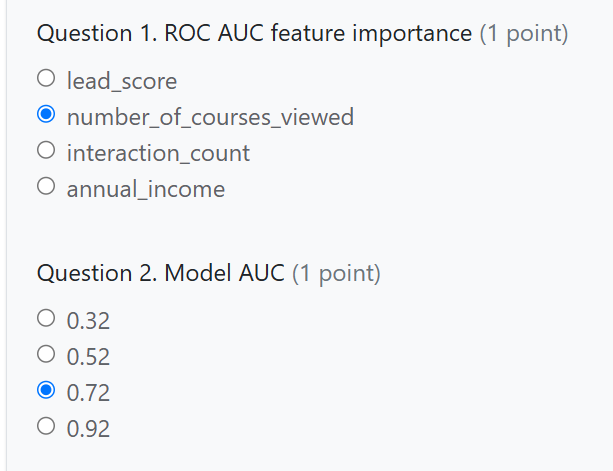

In [124]:
auc = roc_auc_score(y_val, y_pred)
print('AUC on validation data:', round(auc, 3))

AUC on validation data: 0.817


In [125]:
y_pred_bin = model.predict(X_val)
roc_auc_score(y_val, y_pred_bin)

np.float64(0.647564950627936)

**Question 3: Precision and Recall**
Now let's compute precision and recall for our model.


*   Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
*   For each threshold, compute precision and recall
*   Plot them

At which threshold precision and recall curves intersect?